In [21]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')



[]

In [22]:
d_p = 40
d_V = 80
epochs = 300


In [23]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(80,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
])



In [24]:
folder_path = "data/test_data/example_data/heat2d/"

In [25]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs})

2025-03-16 20:32:27,608 - sciml.model.deeponet.deeponet - INFO - Model initialized with 300 epochs, 32 batch size, 0.001 learning rate


In [26]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 4455.03it/s]


In [27]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 80)
(40, 8000, 3)
(40, 8000)


In [28]:
loss_history_train,loss_history_test = model.fit()

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 5483.11it/s]


2025-03-16 20:32:28.116649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [40,8000]
	 [[{{node Placeholder/_2}}]]
Training progress:   0%|          | 0/300 [00:00<?, ?it/s]2025-03-16 20:32:28.137438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [32,8000]
	 [[{{node Placeholder/_2}}]]
2025-03-16 20:32:28.506918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeh

In [29]:
print(loss_history_train)

[0.3233814239501953, 0.2927292287349701, 0.29456931352615356, 0.28803813457489014, 0.27708715200424194, 0.26923590898513794, 0.268725723028183, 0.26676154136657715, 0.2588200271129608, 0.25129812955856323, 0.24707886576652527, 0.24396221339702606, 0.23969529569149017, 0.23418766260147095, 0.22902607917785645, 0.2249894142150879, 0.2203235924243927, 0.21396200358867645, 0.20777201652526855, 0.202562615275383, 0.19673869013786316, 0.1899072229862213, 0.18369638919830322, 0.17717744410037994, 0.17006410658359528, 0.1639646738767624, 0.1576715111732483, 0.15308459103107452, 0.14859947562217712, 0.14540201425552368, 0.14228293299674988, 0.14072149991989136, 0.13833993673324585, 0.13665413856506348, 0.13481764495372772, 0.13246241211891174, 0.13072136044502258, 0.12857046723365784, 0.1263439953327179, 0.12460346519947052, 0.12260641902685165, 0.12074040621519089, 0.1193290650844574, 0.11776645481586456, 0.11611580103635788, 0.11455374211072922, 0.1131235808134079, 0.11174291372299194, 0.1102

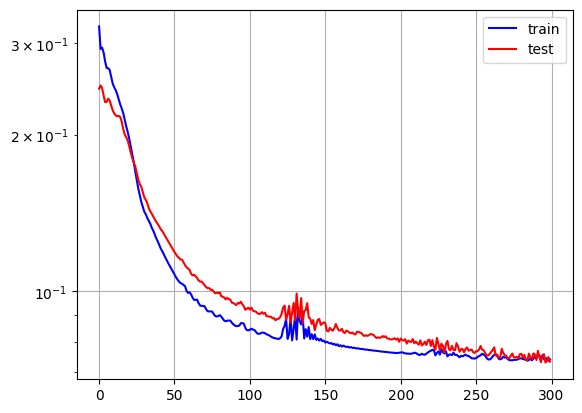

In [30]:
plt.plot(loss_history_train,color='blue')
plt.plot(loss_history_test,color='red')
plt.legend(['train','test'])
#log 
plt.yscale('log')
plt.grid()
plt.show()